In [1]:
#!/usr/bin/env conda run -n newenv1 python
import sys
print(sys.executable)

Note: 
- the function matplotlib. import griddata is superseeded--> module 'matplotlib.mlab' has no attribute 'griddata'
- list of savepoint
    - 1) salvataggio con vecchie funzioni
    - 2) salvataggio pulito con l'indispensabile

In [134]:
import pandas as pd
import numpy as np
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.spatial.transform import Rotation as Rot
from mpl_toolkits.mplot3d import Axes3D

In [84]:

df1 = pd.read_excel('TABIN/pred_class_leapfrog.xlsx')


In [85]:
df1.head(2)

,X,Y,Z,Hole_ID,pred_class
0,249852.32,722565.18,-263.4,PH04,4
1,249852.32,722565.18,-263.9,PH04,4


In [107]:
# carico le coordinate della power house
df2=pd.read_excel('TABIN/coo_vert_powerhouse.xlsx')
df2 = df2.loc[:,['X','Y','Z']]
point0 = df2.loc[0,['X','Y','Z']].to_numpy()
point1 = df2.loc[1,['X','Y','Z']].to_numpy()
point2 = df2.loc[2,['X','Y','Z']].to_numpy()
point3 = df2.loc[3,['X','Y','Z']].to_numpy()
point4 = df2.loc[4,['X','Y','Z']].to_numpy()
point5 = df2.loc[5,['X','Y','Z']].to_numpy()
point6 = df2.loc[6,['X','Y','Z']].to_numpy()
point7 = df2.loc[7,['X','Y','Z']].to_numpy()

# check data
lunghezza = round(np.linalg.norm(point0-point1),2)
larghezza = round(np.linalg.norm(point0-point4),2)
altezza   = round(np.linalg.norm(point0-point2),2)
lunghezza, larghezza, altezza

(91.67, 19.5, 13.0)

In [110]:
# porto l'origine sul punto 0
df2['xc'] = df2.X - df2.loc[0,'X']
df2['yc'] = df2.Y - df2.loc[0,'Y']
df2.head(2)

,X,Y,Z,xc,yc
0,249835.43,722587.88,-259,0.00,0.00
1,249881.91,722508.87,-259,46.48,-79.01


In [111]:
# ruoto le coordinate

theta     = (np.arctan(df2.loc[1,'xc']/df2.loc[1,'yc']))
thetagrad = theta/np.pi*180

df2['xr'] = round(df2.xc * np.cos(theta) - df2.yc * np.sin(theta),2)
df2['yr'] = round(df2.yc * np.cos(theta) + df2.xc * np.sin(theta),2)
df2

,X,Y,Z,xc,yc,xr,yr
0,249835.43,722587.88,-259,0.00,0.00,0.00,0.00
1,249881.91,722508.87,-259,46.48,-79.01,0.00,-91.67
2,249835.43,722587.88,-272,0.00,0.00,0.00,0.00
3,249881.91,722508.87,-272,46.48,-79.01,0.00,-91.67
4,249852.35,722597.57,-259,16.92,9.69,19.50,-0.23
5,249897.45,722517.83,-259,62.02,-70.05,17.94,-91.82
6,249852.35,722597.57,-272,16.92,9.69,19.50,-0.23
7,249897.45,722517.83,-272,62.02,-70.05,17.94,-91.82


In [124]:
# modifico le coordinate (sono state prese a mano quindi c'è un po id errore)

df2.loc[4,'xr'] = larghezza
df2.loc[4,'yr'] = 0
df2.loc[5,'xr'] = larghezza
df2.loc[5,'yr'] = -lunghezza
;
df2.loc[6,'xr'] = larghezza
df2.loc[6,'yr'] = 0
df2.loc[7,'xr'] = larghezza
df2.loc[7,'yr'] = -lunghezza
df2['zr']       = df2['Z']
df2.drop(columns=['xc','yc'], inplace=True)
df2

,X,Y,Z,xr,yr,zr
0,249835.43,722587.88,-259,0.0,0.00,-259
1,249881.91,722508.87,-259,0.0,-91.67,-259
2,249835.43,722587.88,-272,0.0,0.00,-272
3,249881.91,722508.87,-272,0.0,-91.67,-272
4,249852.35,722597.57,-259,19.5,0.00,-259
5,249897.45,722517.83,-259,19.5,-91.67,-259
6,249852.35,722597.57,-272,19.5,0.00,-272
7,249897.45,722517.83,-272,19.5,-91.67,-272


In [129]:
# traslo e ruoto le coordinate dei boreholes
# porto l'origine sul punto 0
df1['xc'] = df1.X - df2.loc[0,'X']
df1['yc'] = df1.Y - df2.loc[0,'Y']
# ruoto le coordinate
df1['xr'] = round(df1.xc * np.cos(theta) - df1.yc * np.sin(theta),2)
df1['yr'] = round(df1.yc * np.cos(theta) + df1.xc * np.sin(theta),2)
df1['zr'] = df1['Z']
df1.drop(columns=['xc','yc'], inplace=True)
df1.head(2)

,X,Y,Z,Hole_ID,pred_class,xr,yr,zr
0,249852.32,722565.18,-263.4,PH04,4,3.05,-28.13,-263.4
1,249852.32,722565.18,-263.9,PH04,4,3.05,-28.13,-263.9


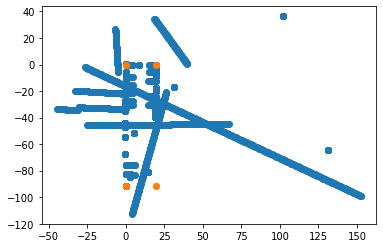

In [133]:
plt.scatter(df1.xr, df1.yr)
plt.scatter(df2.xr, df2.yr)

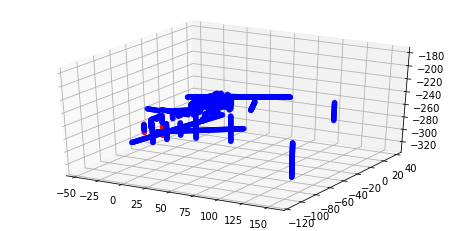

In [143]:
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(df1.xr, df1.yr, df1.zr, c='b', marker='o')
ax.scatter(df2.xr, df2.yr, df2.zr, c='r', marker='o')
plt.show()

In [202]:
# creo l'instanza di interpolazione
points = df1.loc[:,['xr','yr','zr']].to_numpy()
values = df1.loc[:,['pred_class']].to_numpy()
linInter= LinearNDInterpolator(points, values)
#
xi = np.linspace(0,1,2)
yi = np.linspace(df2.loc[0,'yr'], df2.loc[1,'yr'], 101)
zi = np.linspace(df2.loc[0,'zr'], df2.loc[2,'zr'], 11)
#
gx,gy,gz = np.meshgrid(xi,yi,zi)

zi=griddata(points, values, (gx,gy,gz), method='nearest')

In [236]:
z2d = zi[:,0,:]
z2d = z2d[:,:,0]
z2d.shape

(101, 11)

TypeError: Invalid shape (101, 2, 11, 1) for image data

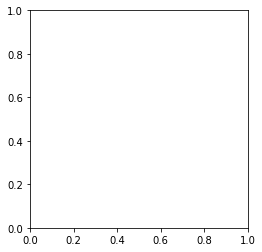

In [241]:
plt.imshow(zi, vmin=zi.min(), vmax=zi.max(),origin='lower', 
           extent=[yi.min(),yi.max(),zi.min(),zi.max()], cmap='jet')
plt.colorbar()

ValueError: cannot reshape array of size 2222 into shape (101,1)

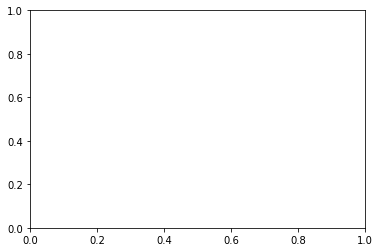

In [240]:
plt.figure()
plt.pcolormesh(yi, zi, z2d)
plt.colorbar() # Color Bar
plt.show()

In [175]:
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(),origin='lower', 
           extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='jet')
plt.colorbar()

NameError: name 'array' is not defined

In [73]:


# avvio la funzione di interpolazione
xi = np.array([0])
yi = np.linspace(point0[1], point2[1], 20)
zi = np.linspace(point0[1], point1[1], 15)
xi,yi,zi=np.meshgrid(xi,yi,zi)
#
#df2['data']=linInter(array_pred)
#df2

(91.66771787277376, 19.49826915393647, 13.0)

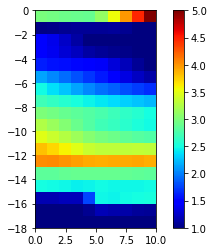

In [5]:
#Plotto i risultati
# creo meshgrid partendo da 3 array ad una dimensione (altrimenti dovrei gia avere Z in due dimensioni)

yi = np.linspace(0, lunghezza, 100)
zi = np.linspace(0, altezza, 18)
xi,yi=np.meshgrid(xi,yi)
X = df2.Y.to_numpy()    #1d array
Y = df2.Z.to_numpy()    #1d array
Z = df2.data.to_numpy() #1d array
#  Ho bisogno di interpolare perché 1D array non possono essere plottati come contour plot
rbf = scipy.interpolate.Rbf(X,Y,Z, function='linear')
zi=rbf(xi,yi)  #adesso zi ha la shape giusta
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(),origin='lower', 
           extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='jet')
plt.colorbar()

### ESEMPIO 2 GRIDDATA E NEIGHBOUR

In [19]:
#carico le coordinate di interpolazione
df2=pd.read_excel('TABIN/OUT_XYZ.xlsx')
array_pred = df2.loc[:,['X','Y','Z']].to_numpy()

# avvio la funzione di interpolazione
df2['data']=griddata(points, values, array_pred, method='nearest')
df2.tail(18)

,X,Y,Z,data
191,5,10,-1,1
192,5,10,-2,4
193,5,10,-3,4
194,5,10,-4,4
195,5,10,-5,4
196,5,10,-6,3
197,5,10,-7,2
198,5,10,-8,2
199,5,10,-9,2
200,5,10,-10,2


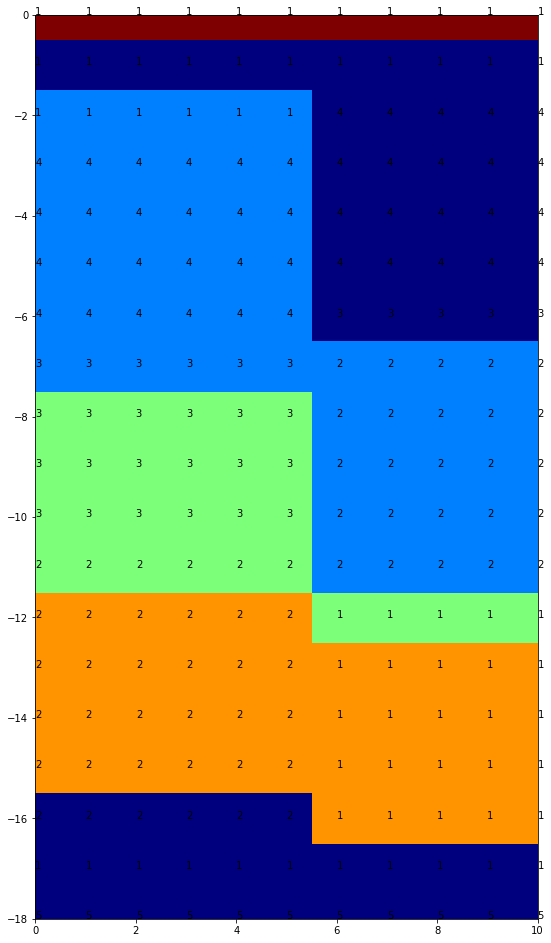

In [54]:
#Plotto i risultati
# creo meshgrid partendo da 3 array ad una dimensione (altrimenti dovrei gia avere Z in due dimensioni)

xi = np.linspace(0, 10, 20)
yi = np.linspace(0, -18, 36)

xi,yi=np.meshgrid(xi,yi)
X = df2.Y.to_numpy()    #1d array
Y = df2.Z.to_numpy()    #1d array
Z = df2.data.to_numpy() #1d array
#  Ho bisogno di interpolare perché 1D array non possono essere plottati come contour plot

zi=griddata((X,Y), Z, (xi,yi), method='nearest') # crea una lista 2D di dimensioni dimx,dimy

plt.figure(figsize=(9,18))

plt.imshow(zi, vmin=Z.min(), vmax=Z.max(),origin='lower', 
          extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='jet')

for x,y,z in zip(X,Y,Z):    
    label = "{:.0f}".format(z)
    plt.annotate(label, (x,y))
    
# nel plot non si vede ma le classi zi sono corrette e coinbaciano con 

In [55]:
zi

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3,